# Лабораториска Вежба 1
## Класификација со Naïve Bayes и Gaussian Discriminant Analysis модели (LDA и QDA)

### Вчитување на податочното множество

Го користам податочното множество од следниот линк: [Wine Quality](https://www.kaggle.com/datasets/ghassenkhaled/wine-quality-data?select=Wine_Quality_Data.csv)
<br>
Ова податочно множество се состои од некои карактеристики на вината како, киселост, шеќер, pH ниво и алкохол. Исто така содржи и мерка за квалитет од (3-9) така што поголем број значи повисок квалитет на виното. 
<br>
Таргет колоната, односно тоа што се предвидува е типот на вино односно црвено или бело вино.


In [147]:
import pandas as pd
import numpy as np 

In [148]:
data = pd.read_csv('/content/drive/MyDrive/MU/Wine_Quality_Data.csv')
data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [149]:
target_names = data['color'].unique()
num_targets = len(target_names)
print('Number of target classes:', num_targets)
print('Target class names:', target_names)

Number of target classes: 2
Target class names: ['red' 'white']


In [150]:
features = data.columns[:-1]
num_features = len(features)
print('Number of features:', num_features)
print('Feature names:', features)

Number of features: 12
Feature names: Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


### Анализа на податоците

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [152]:
data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [153]:
data['color'].value_counts()

white    4898
red      1599
Name: color, dtype: int64

### Визуелизација

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [113]:
sns.pairplot(data)

Output hidden; open in https://colab.research.google.com to view.

In [168]:
custom_palette = ['red', 'gray']
sns.set_palette(custom_palette)

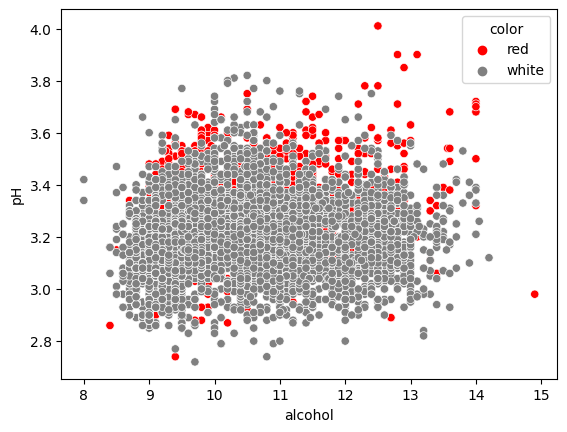

In [169]:
sns.scatterplot(x='alcohol', y='pH', hue='color', data=data)
plt.show()

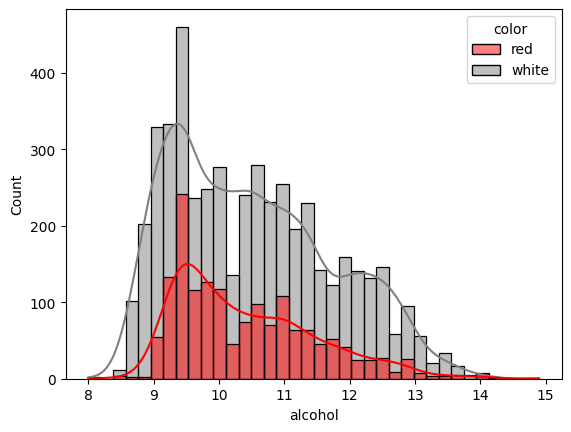

In [170]:
sns.histplot(x='alcohol', hue='color', data=data, kde=True)
plt.show()

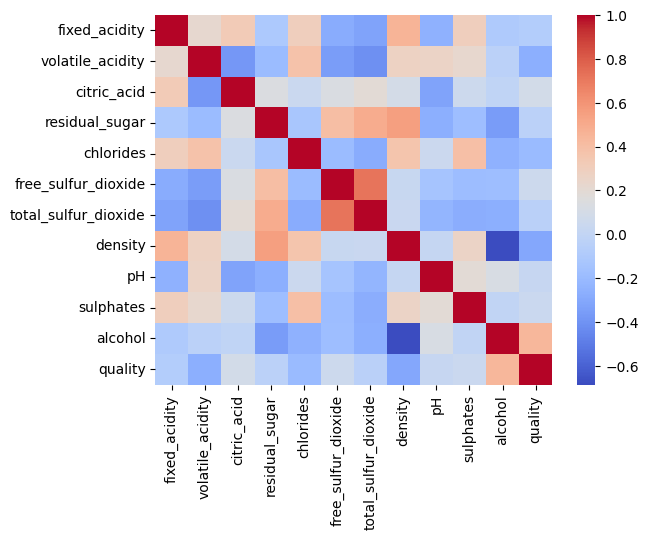

In [173]:
corr_matrix = data.corr()

sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

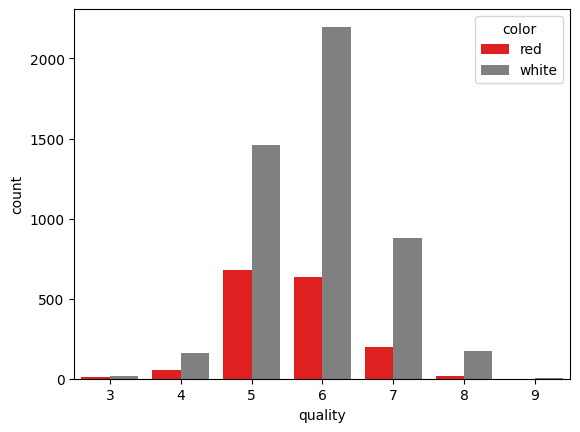

In [172]:
sns.countplot(x='quality', hue='color', data=data)
plt.show()

### Енкодирање на таргет колоната

In [181]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

In [182]:
data["color"] = label.fit_transform(data["color"])

In [183]:
data.head(-5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6487,6.8,0.220,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,5,1
6488,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,6,1
6489,6.1,0.340,0.29,2.20,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,6,1
6490,5.7,0.210,0.32,0.90,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6,1


### Намалување на димензијата

Бидејќи таргет колоната е нерамномерно распоредена, истата ја транформирам така што од таргет 1 земам помалку примероци

In [184]:
even_data = pd.concat([data[data['color'] == 1][:1599], data[data['color'] == 0]], axis = 0)

In [185]:
even_data['color'].value_counts()

1    1599
0    1599
Name: color, dtype: int64

### Naïve Bayes

In [186]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(even_data.drop('color', axis=1), even_data['color'], test_size=0.2, random_state=42)

clf = GaussianNB()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Naive Bayes accuracy for the Wine Quality dataset', np.round(accuracy, 3))

Naive Bayes accuracy for the Wine Quality dataset 0.959


### Linear Discriminant Analysis (LDA)

In [187]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train, X_test, y_train, y_test = train_test_split(even_data.drop('color', axis=1), even_data['color'], test_size=0.2, random_state=42)

clf = LinearDiscriminantAnalysis()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('LDA accuracy for the Wine Quality dataset', np.round(accuracy, 3))

LDA accuracy for the Wine Quality dataset 0.995


### Quadratic Discriminant Analysis (QDA)

In [188]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

X_train, X_test, y_train, y_test = train_test_split(even_data.drop('color', axis=1), even_data['color'], test_size=0.2, random_state=42)

clf = QuadraticDiscriminantAnalysis()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('QDA accuracy for the Wine Quality dataset', np.round(accuracy, 3))

QDA accuracy for the Wine Quality dataset 0.986


### Заклучок

Бидејќи податочното множество беше нерамномерно распределено истото го поделив со цел двете класи да имаат ист број на појавувања. По оваа поделба трите модели даваат добри резултати при предвидување на типот на вино.